In [93]:
# Import Dependencies
import pandas as pd
import numpy as np

In [94]:
#  Notebook exeercising API
freedom_csv_path = "data/indexfreedom.csv"
#happy_csv_path = "data/TBD"

In [95]:
# READ freedom.csv

freedom_df = pd.read_csv(freedom_csv_path, encoding="utf-8")
freedom_df

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.000000,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,2008,VNM,Vietnam,South Asia,6.666667,4.349101,5.694847,5.600000,9.496239,5.0,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2008,ZMB,Zambia,Sub-Saharan Africa,4.800000,4.578003,3.688652,4.400000,7.878084,10.0,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0


In [96]:
# drop rows for 2008-2015 
#other_years = freedom_df[ (freedom_df['year'] < 2016) ].index

# Delete these row indexes from dataFrame
#only_2016_df= freedom_df.drop(other_years , inplace=True)


#freedom_df

In [97]:
# keep only the ef_score and pf_score
scores_df= freedom_df[['countries','hf_score','pf_expression_internet']]
scores_df= scores_df.dropna()
scores_df

,countries,hf_score,pf_expression_internet
0,Albania,7.568140,10.000000
1,Algeria,5.135886,7.500000
2,Angola,5.640662,7.500000
3,Argentina,6.469848,10.000000
4,Armenia,7.241402,7.500000
...,...,...,...
1452,Uruguay,7.947847,10.000000
1453,Venezuela,5.257879,6.666667
1454,Vietnam,6.420206,3.333333
1456,Zambia,6.647724,10.000000


In [98]:
import matplotlib.pyplot as plt

In [99]:
# plot
# first turn columns into lists
pf_internet_score = scores_df["pf_expression_internet"].values
hf_score = scores_df["hf_score"].values
countries = scores_df["countries"].values


In [100]:

scores_df.describe()

,hf_score,pf_expression_internet
count,1129.000000,1129.000000
mean,7.043819,8.556244
std,1.056958,2.362139
min,4.095028,0.000000
25%,6.291418,7.500000
50%,6.933953,10.000000
75%,8.047116,10.000000
max,9.126313,10.000000


In [101]:
from scipy.stats import linregress

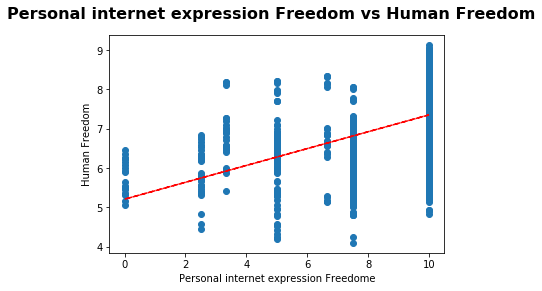

<Figure size 432x288 with 0 Axes>

In [110]:
x_axis = pf_internet_score
y_axis = hf_score

(slope, intercept, r_value, p_value, se) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Personal internet expression Freedom vs Human Freedom", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

ax.set_xlabel("Personal internet expression Freedome")
ax.set_ylabel("Human Freedom")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'r--')

plt.show()
plt.savefig("plots/internet.png")


In [103]:
print(f'pvalue, {p_value}')

pvalue, 6.290817322000641e-66


In [104]:
scores_df.columns

Index(['countries', 'hf_score', 'pf_expression_internet'], dtype='object')

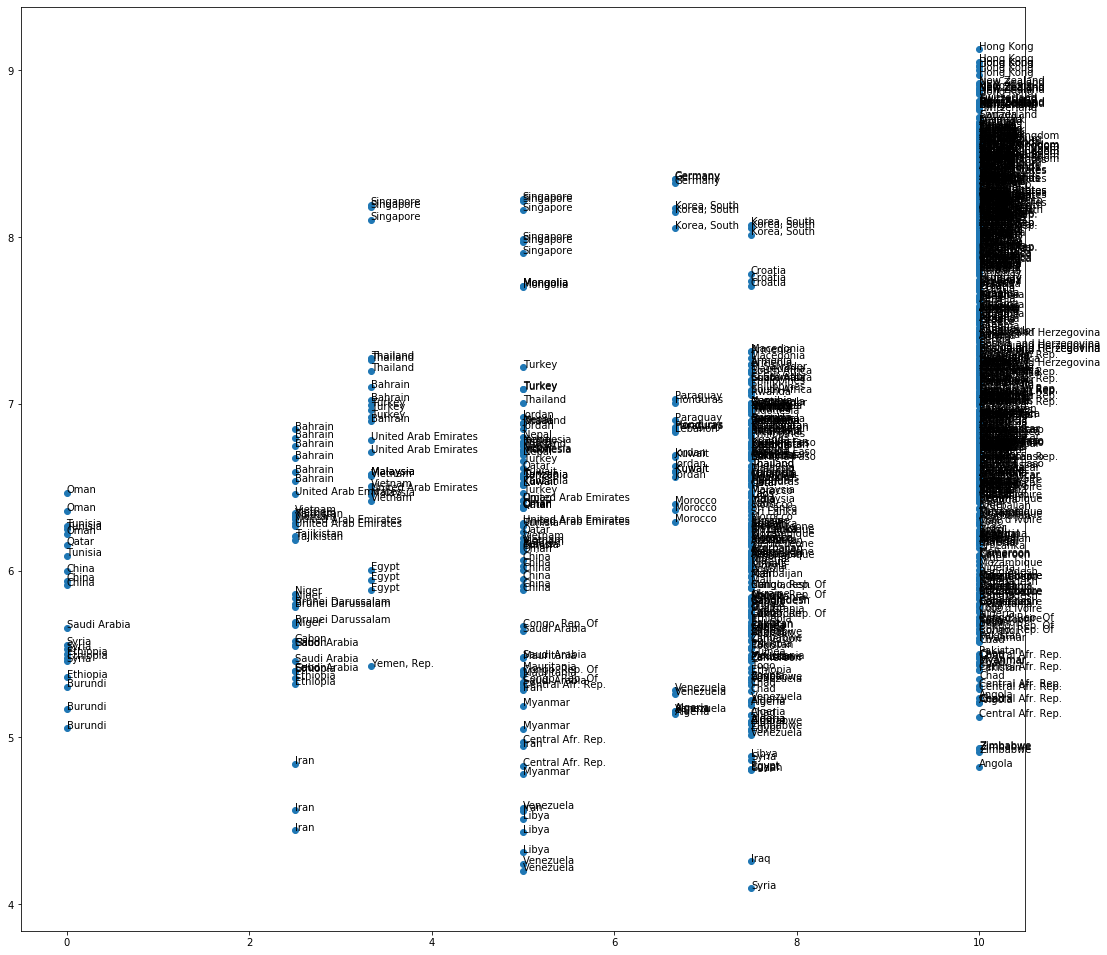

In [105]:
# create plot

# fig, ax = plt.subplots()
# ax.scatter(pf_internet_score, hf_score)

plt.figure(figsize=(18,17))
plt.scatter(pf_internet_score,scores_df.hf_score)
#plt.scatter(scores_df.pf_expression_internet,scores_df.hf_score)

for i, txt in enumerate(countries):
   plt.annotate(txt, (pf_internet_score[i],hf_score[i]))
    


Text(0, 0.5, 'Human Freedom')

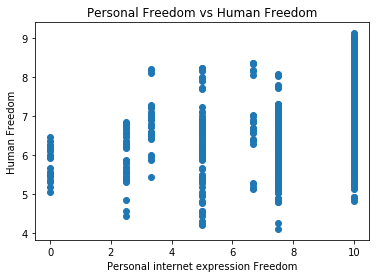

In [106]:
# with out labels bc idk how to clean it up
fig, ax = plt.subplots()
ax.scatter(pf_internet_score, hf_score)
plt.title("Personal Freedom vs Human Freedom")
plt.xlabel("Personal internet expression Freedom")
plt.ylabel("Human Freedom")

In [107]:
import scipy.stats as stats

In [108]:
# give or take a few outliers it seems to be that higher personal freedom correlates to higher ecoonomic freedom
# independent t-test
stats.ttest_ind(pf_internet_score, hf_score, equal_var=False)

Ttest_indResult(statistic=19.637455466637384, pvalue=6.5249558405812295e-77)

In [109]:
# pvalue is greater than .05 so accept the null?
